KNN ALGORITHM

In [5]:
import pandas as pd

In [6]:
data=pd.read_csv("dataset.csv")
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
data.columns=["buying","maintenance","doors","persons","trunk_size","safety","class_label"]
data.head()

,buying,maintenance,doors,persons,trunk_size,safety,class_label
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [9]:
Counter(data.class_label)

Counter({'unacc': 1209, 'acc': 384, 'good': 69, 'vgood': 65})

In [10]:
data.class_label.value_counts()

class_label
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: title={'center': 'COUNT(TARGET)'}, xlabel='class_label'>

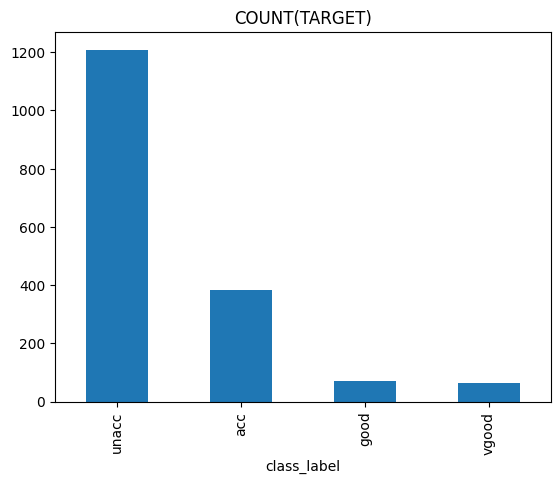

In [11]:
data.class_label.value_counts().plot(kind='bar',title="COUNT(TARGET)")

In [12]:
data.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [13]:
data.maintenance.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [14]:
data.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [15]:
data.doors.replace(("5more"),('5'),inplace=True)
data.doors.unique()


C:\Users\edwar\AppData\Local\Temp\ipykernel_5904\988692198.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.doors.replace(("5more"),('5'),inplace=True)


array(['2', '3', '4', '5'], dtype=object)

In [16]:
data.persons.unique()

array(['2', '4', 'more'], dtype=object)

In [17]:
data.persons.replace(("more"),(5),inplace=True)
data.persons.unique()


C:\Users\edwar\AppData\Local\Temp\ipykernel_5904\3152847636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.persons.replace(("more"),(5),inplace=True)


array(['2', '4', 5], dtype=object)

In [18]:
data.trunk_size.unique()

array(['small', 'med', 'big'], dtype=object)

In [19]:
data.safety.unique()

array(['med', 'high', 'low'], dtype=object)

In [20]:
x=data.iloc[:,:-1]
y=data.class_label

In [21]:
le=LabelEncoder()
x.buying=le.fit_transform(x.buying)
x.maintenance=le.fit_transform(x.maintenance)
x.trunk_size=le.fit_transform(x.trunk_size)
x.safety=le.fit_transform(x.safety)
x.head()

C:\Users\edwar\AppData\Local\Temp\ipykernel_5904\3881393649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.buying=le.fit_transform(x.buying)
C:\Users\edwar\AppData\Local\Temp\ipykernel_5904\3881393649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.maintenance=le.fit_transform(x.maintenance)
C:\Users\edwar\AppData\Local\Temp\ipykernel_5904\3881393649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,buying,maintenance,doors,persons,trunk_size,safety
0,3,3,2,2,2,2
1,3,3,2,2,2,0
2,3,3,2,2,1,1
3,3,3,2,2,1,2
4,3,3,2,2,1,0


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [23]:
k=int(input("ENTER THE VALUE OF k:"))
if(k<=0):
    raise ValueError

In [24]:
model=KNeighborsClassifier(n_neighbors=k,metric="euclidean")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [29]:
print("ACCURACY IS",accuracy_score(y_test,y_pred))

ACCURACY IS 0.9277456647398844


In [30]:
print("CONFUSION MATRIX IS")
confusion_matrix(y_test,y_pred)

CONFUSION MATRIX IS


array([[ 66,   2,   8,   0],
       [  6,   4,   0,   0],
       [  2,   0, 241,   0],
       [  6,   1,   0,  10]], dtype=int64)

In [27]:
pd.crosstab(y_test,y_pred)

col_0,acc,good,unacc,vgood
class_label,,,,
acc,66,2,8,0
good,6,4,0,0
unacc,2,0,241,0
vgood,6,1,0,10
